### Logistic regression - An alternative Titanic tutorial
>https://www.youtube.com/watch?v=in6PDZXkqrw&list=PLMZlcEhzqrV5pNo-f_9K11PJLlVPntqy7&index=3

Predict survival/deceased classification with Logistic Regression

In [252]:
# Import dependecnies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Exploratory Data Analysis of the Titanic data

In [253]:
# import Titanic data from Seaborn
titanic = sns.load_dataset("titanic")
#titanic.head()
# check for NUL value
print(titanic.isnull().sum()) # summarise NULL values in the data per feature
#sns.heatmap(titanic.isnull()) # visualise missing data
print(titanic.columns)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [254]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


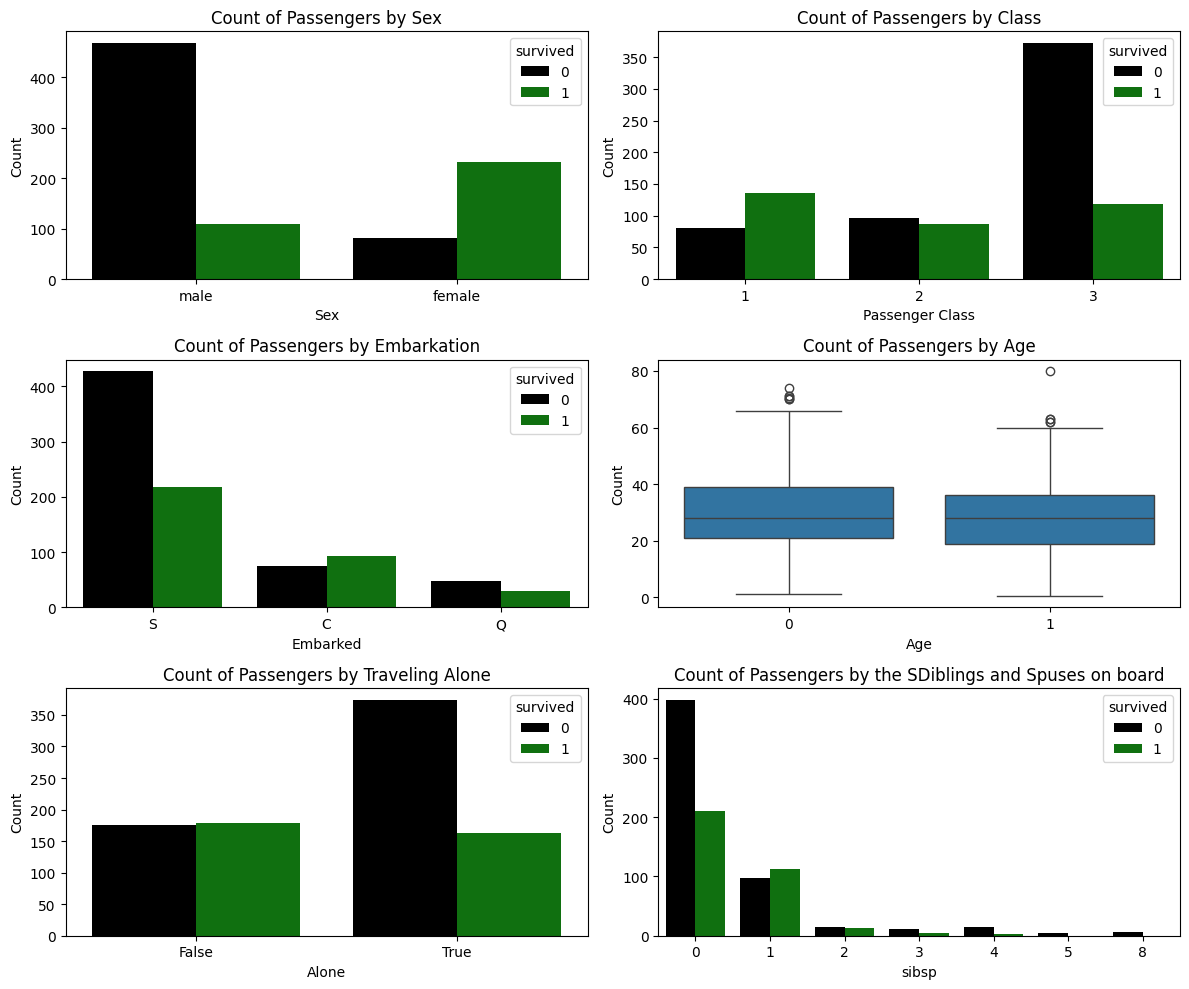

In [255]:
# visualise survival by features
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axes array to use 1D indexing
axes = axes.flatten()

# Count plot for 'sex' vs 'survived'
sns.countplot(x="sex", hue="survived", data=titanic, palette=["black", "green"], ax=axes[0])
axes[0].set_title('Count of Passengers by Sex')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

# Count plot for 'pclass' vs 'survived'
sns.countplot(x="pclass", hue="survived", data=titanic, palette=["black", "green"], ax=axes[1])
axes[1].set_title('Count of Passengers by Class')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Count')

# Count plot for 'embarked' vs 'survived'
sns.countplot(x="embarked", hue="survived", data=titanic, palette=["black", "green"], ax=axes[2])
axes[2].set_title('Count of Passengers by Embarkation')
axes[2].set_xlabel('Embarked')
axes[2].set_ylabel('Count')

# Count plot for 'age' vs 'survived' (binned histplot for grouping)
sns.boxplot(x="survived", y="age", data=titanic, ax=axes[3])
axes[3].set_title('Count of Passengers by Age')
axes[3].set_xlabel('Age')
axes[3].set_ylabel('Count')

# Count plot for 'alone' vs 'survived'
sns.countplot(x="alone", hue="survived", data=titanic, palette=["black", "green"], ax=axes[4])
axes[4].set_title('Count of Passengers by Traveling Alone')
axes[4].set_xlabel('Alone')
axes[4].set_ylabel('Count')

# Count plot for 'sibsp' vs 'survived'
sns.countplot(x="sibsp", hue="survived", data=titanic, palette=["black", "green"], ax=axes[5])
axes[5].set_title('Count of Passengers by the SDiblings and Spuses on board')
axes[5].set_xlabel('sibsp')
axes[5].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


#### Remove reundant feature, fill missing data

- Only keep one of redundant columns such as embarked and embark_tow or pclass and class.
- Remove deck column as it's missing too many values 
- fill missing age and embarked values
- digitise (add numerical lables) to text based data (such as 'sex')

In [256]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [257]:
# drop redundant and fill or drop incomplete data
#print(titanic.columns)
'''Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],'''
#print(titanic.isnull().sum()) # age needs to be filled, deck to be dropped, embark town fill
# Dropping multiple columns
titanic.drop(['class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive'], axis=1, inplace=True)
print(titanic.isnull().sum()) # age needs to be filled, deck to be dropped, embark town fill
#titanic.head()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
alone         0
dtype: int64


In [258]:
# fill missing data in age and embarked
#titanic.describe()
# Fill missing age (numerical) values with the median age
titanic['age'].fillna(titanic['age'].median(), inplace=True)
# Fill missing embarked (categorical) values with the mode
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)
print(titanic.isnull().sum())
#titanic.describe()
titanic.head()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


#### Label Encoding 
> - Add numeric lables to sex and embarked with SKlearn LabelEncoder and OneHotEncoder

- Label Encoding
    Use Case: Assigns a unique integer to each category. For binary data like sex, this might convert "male" to 0 and "female" to 1 (or vice versa).

- One-Hot Encoding
    Use Case: When there are more than two categorical values 
    **Example:**  
    For the category "color" with values `["red", "green", "blue"]`, it would become:

    | red | green | blue |
    |-----|-------|------|
    |  1  |   0   |  0   |  (for "red")  |
    |  0  |   1   |  0   |  (for "green")|
    |  0  |   0   |  1   |  (for "blue") |

- another way is pandas pd.get_dummies(); a function in the pandas library used to convert categorical variables into a format that can be provided to machine learning algorithms to improve predictions.
    

In [259]:
# For binary categorical variables such as 'sex', Label Encoding is generally simpler and more efficient.
# convert categorical data into numerical form 
    #  because most machine learning algorithms require numerical input. 
from sklearn import preprocessing # import preprocessing module
le_sex = preprocessing.LabelEncoder() #initiate label encoder
le_sex.fit(titanic['sex']) #Fit the encoder to the 'sex' column to find unique values
sex = le_sex.transform(titanic['sex'])# assign numerical values to unique categorical values (Female, male -> 0,1)
titanic = titanic.drop(['sex'], axis = 1)#drop original "sex" column
titanic['female'] = sex #Add the encoded 'sex' column back to the DataFrame
print("unique values:",le_sex.classes_) #check what were encoded
print("encoded: ",titanic['female'].unique())
titanic

unique values: ['female' 'male']
encoded:  [1 0]


,survived,pclass,age,sibsp,parch,fare,embarked,alone,female
0,0,3,22.0,1,0,7.2500,S,False,1
1,1,1,38.0,1,0,71.2833,C,False,0
2,1,3,26.0,0,0,7.9250,S,True,0
3,1,1,35.0,1,0,53.1000,S,False,0
4,0,3,35.0,0,0,8.0500,S,True,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,True,1
887,1,1,19.0,0,0,30.0000,S,True,0
888,0,3,28.0,1,2,23.4500,S,False,0
889,1,1,26.0,0,0,30.0000,C,True,1


In [260]:
# do the same label encoding for 'alone'
from sklearn import preprocessing # import preprocessing module
le_alone = preprocessing.LabelEncoder() #initiate label encoder
le_alone.fit(titanic['alone']) #Fit the encoder to the 'alone' column to find unique values
alone = le_alone.transform(titanic['alone'])# assign numerical values to unique categorical values (Female, male -> 0,1)
titanic = titanic.drop(['alone'], axis = 1)#drop original "alone" column
titanic['alone'] = alone #Add the encoded 'alone' column back to the DataFrame
print("unique values:",le_alone.classes_) #check what were encoded
print("encoded: ",titanic['alone'].unique())
titanic

unique values: [False  True]
encoded:  [0 1]


,survived,pclass,age,sibsp,parch,fare,embarked,female,alone
0,0,3,22.0,1,0,7.2500,S,1,0
1,1,1,38.0,1,0,71.2833,C,0,0
2,1,3,26.0,0,0,7.9250,S,0,1
3,1,1,35.0,1,0,53.1000,S,0,0
4,0,3,35.0,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,1,1
887,1,1,19.0,0,0,30.0000,S,0,1
888,0,3,28.0,1,2,23.4500,S,0,0
889,1,1,26.0,0,0,30.0000,C,1,1


In [261]:
# pd.get_dummies() onehotencoding for 'embarked'
embarked = pd.get_dummies(titanic['embarked'], drop_first=True)
embarked = embarked.astype(int)
embarked
titanic=pd.concat([titanic,embarked], axis=1)
titanic.drop(['embarked'], axis=1, inplace=True)
# Rename columns
titanic.rename(columns={'Q': 'Embarked_Q', 'S': 'Embarked_S'}, inplace=True)
titanic.head()

,survived,pclass,age,sibsp,parch,fare,female,alone,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,1,0,1


### Train a Logistic Regression Modle for classification predictions


In [262]:
# Isolate target and feature data

# Define the target variable
y = titanic['survived']
# Drop the 'survived' column and create the features DataFrame
X = titanic.drop('survived', axis=1)
#X

In [263]:
# split the data to training and test data
from sklearn.model_selection import train_test_split # import splitter

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
X_train.shape
X_test.shape

(223, 9)

In [264]:
# Trining the model
from sklearn.linear_model import LogisticRegression
lgm=LogisticRegression(max_iter=1000) # initiate model + add max iter due to a warning

In [265]:
lgm.fit(X_train, y_train) # fit training data

LogisticRegression(max_iter=1000)

In [266]:
# calcualte predictions
prediction=lgm.predict(X_test)

In [267]:
# check report performance
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       134
           1       0.76      0.72      0.74        89

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



### Model Performance Metrics

1. **Precision**:
   - **Class 0**: 0.82 - Out of all the instances predicted as class `0` (not survived), 82% were correct.
   - **Class 1**: 0.76 - Out of all the instances predicted as class `1` (survived), 76% were correct.

2. **Recall**:
   - **Class 0**: 0.85 - Out of all actual class `0` instances, 85% were correctly predicted.
   - **Class 1**: 0.72 - Out of all actual class `1` instances, 72% were correctly predicted.

3. **F1-score**:
   - **Class 0**: 0.84 - Harmonic mean of precision and recall for class `0`.
   - **Class 1**: 0.74 - Harmonic mean of precision and recall for class `1`.

4. **Support**:
   - **Class 0**: 134 instances.
   - **Class 1**: 89 instances.

5. **Accuracy**: 
   - Overall accuracy of **80%**, meaning the model correctly predicted the outcome for 80% of the instances in the dataset.

6. **Macro Avg**:
   - Averages precision, recall, and F1-score across classes, treating all classes equally.

7. **Weighted Avg**:
   - Accounts for support when calculating the average metrics, providing a more realistic view in imbalanced classes.

### Summary
- The model performs well overall with an accuracy of **80%**.
- The precision and recall values show better performance on class `0` (not survived) compared to class `1` (survived).
- The F1-scores indicate a good balance, especially for class `0`.

### Recommendations for Improvement
- **Hyperparameter Tuning**: Adjust model parameters for better performance.
- **Exploring Different Algorithms**: Try other classifiers that may perform better.
- **Resampling Techniques**: Balance the dataset if class distribution is uneven.
